# Welcome to my COVID-19 Project.

Check out the source of my data by this link:

https://www.kaggle.com/imdevskp/corona-virus-report?select=country_wise_latest.csv

First step is to import the data from the CSV file. 

In [13]:
# Open the CSV file with pandas.

import pandas as pd
from pandas import Series,DataFrame

# Set up the COVID-19 CSV file as a dataframe.

covid_df = pd.read_csv('country_wise_latest.csv')

# Let's see a preview of the data by using head() to see first 5 entries.

covid_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [14]:
# Get overall info for our dataset.

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

Like all good data analysis projects this one is trying to answer questions concerning the given data. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions.

We want to answer some basic questions:

    1.) How does the distrubtion of active, recovered cases and deaths look like overall?
    2.) Deaths vs Recovered by WHO Region?
    3.) Top 10 countries with most Deaths?
    4.) Top 10 countries with most Recovered?
    5.) Top 10 countries with most Confirmed?
    6.) 1 week % increase distribution?

So let's start with the first question: 

### 1.) How does the distrubtion of active, recovered cases and deaths look like overall? 

In [20]:
# Let's import what we'll need for the analysis and visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

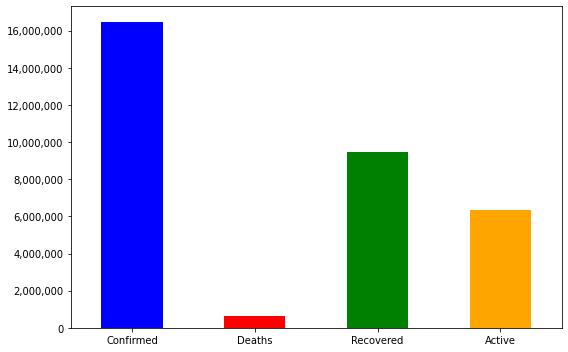

In [22]:
# Create bar chart for Confirmed, Recovered, Active and Death Cases.

ax = covid_df[covid_df.columns[1:5]].sum().plot.bar(figsize=(8,5), color=["blue", "red", "green", "orange"])

# Set y axis values to plain text, create title and set x axis rotation to 0.

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)

# Get nicer representation of y axis values with ',' seperator.

ax.get_yaxis().set_major_formatter(
     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()

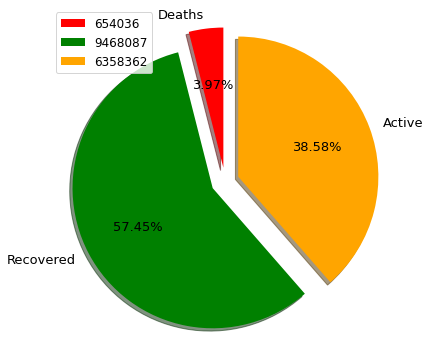

In [30]:
# Create a pie chart to visualize overall data.

covid_df[covid_df.columns[2:5]].sum().plot.pie(figsize=(6,6), autopct="%0.2f%%", fontsize=13, colors=["red", "green", "orange"]
                                               ,explode=(0.1,0.1,0.1), shadow=True, startangle=90)

plt.ylabel('')
plt.legend(covid_df[covid_df.columns[2:5]].sum(), prop={'size': 12})
plt.tight_layout()

plt.show()

So overall the number of Recovered Cases seems to dominate quite clearly. 

### 2.) Deaths vs Recovered by WHO Region? 

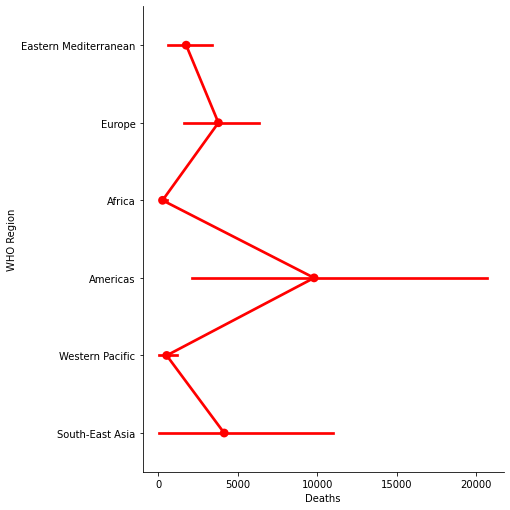

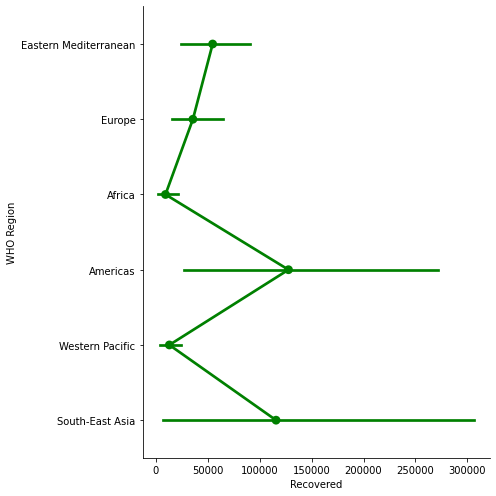

In [24]:
# Recovered vs Deaths by WHO Region.

ax = sns.catplot(x='Deaths', y='WHO Region', data=covid_df, color="red", height=7, aspect=1, kind="point")

ax = sns.catplot(x='Recovered', y='WHO Region', data=covid_df, color="green", height=7, aspect=1, kind="point")

plt.tight_layout()

### 3.) Top 10 countries with most Deaths? 

In [25]:
# Get data to visualise countries with top 10 most deaths.

most_deaths_df = covid_df.loc[covid_df.Deaths.nlargest(10).index]

most_deaths_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe
157,Spain,272421,28432,150376,93613,0,0,0,10.44,55.20,18.91,264836,7585,2.86,Europe
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


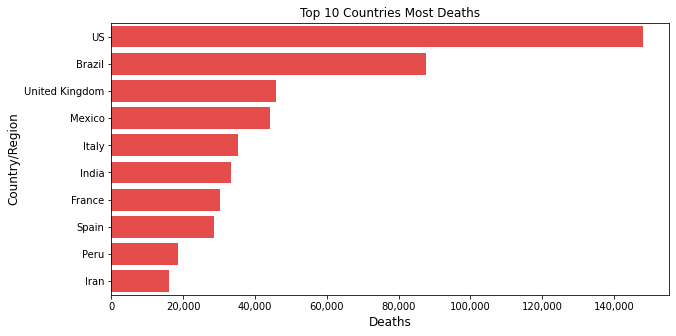

In [26]:
# Visualise countries with top 10 most deaths.

plt.figure(figsize=(10, 5))

ax = sns.barplot(y=most_deaths_df['Country/Region'], x=most_deaths_df['Deaths'], alpha=0.8, color="red")

plt.title('Top 10 Countries Most Deaths')
plt.ylabel('Country/Region', fontsize=12)
plt.xlabel('Deaths', fontsize=12)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

So the US seems to have the biggest number of deaths so far. Brazil is on the second place but quite behind compared to the US. 

### 4.) Top 10 countries with most Recovered?

In [27]:
# Get data for Top 10 countries with most Recovered.

most_recovered_df = covid_df.loc[covid_df.Recovered.nlargest(10).index]

most_recovered_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean
128,Pakistan,274289,5842,241026,27421,1176,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean


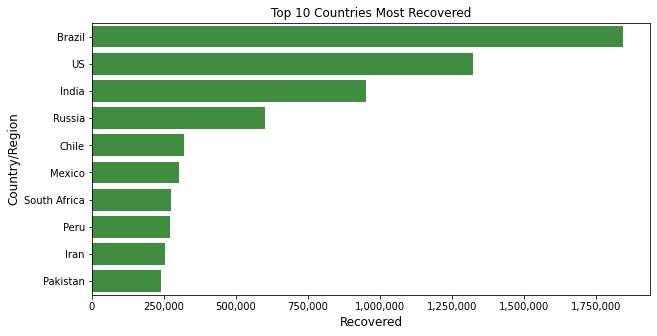

In [28]:
# Visualise countries with top 10 most Recovered.

plt.figure(figsize=(10, 5))

ax = sns.barplot(y=most_recovered_df['Country/Region'], x=most_recovered_df['Recovered'], alpha=0.8, color="green")

plt.title('Top 10 Countries Most Recovered')
plt.ylabel('Country/Region', fontsize=12)
plt.xlabel('Recovered', fontsize=12)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### 5.) Top 10 countries with most Confirmed? 

In [92]:
# Get data for Top 10 countries with most Confirmed.

most_confirmed_df = covid_df.loc[covid_df.Confirmed.nlargest(10).index]

most_confirmed_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


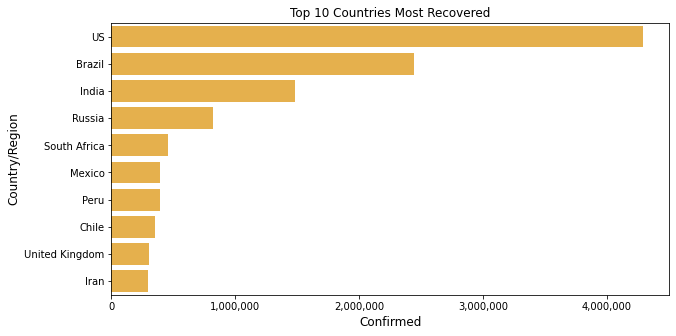

In [93]:
# Visualise Top 10 countries with most Confirmed.

plt.figure(figsize=(10, 5))

ax = sns.barplot(y=most_confirmed_df['Country/Region'], x=most_confirmed_df['Confirmed'], alpha=0.8, color="orange")

plt.title('Top 10 Countries Most Confirmed')
plt.ylabel('Country/Region', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### 6.) 1 week % increase distribution?

In [43]:
# Get data for 1 week % increase. Sort by values descending.

one_week_increase_df = covid_df.sort_values(['1 week % increase'], ascending=False)
                                                                  
one_week_increase_df                              

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
130,Papua New Guinea,62,0,11,51,0,0,0,0.00,17.74,0.00,19,43,226.32,Western Pacific
63,Gambia,326,8,66,252,49,2,6,2.45,20.25,12.12,112,214,191.07,Africa
11,Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa
99,Libya,2827,64,577,2186,158,4,24,2.26,20.41,11.09,1980,847,42.78,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
100,Liechtenstein,86,1,81,4,0,0,0,1.16,94.19,1.23,86,0,0.00,Europe
59,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,Western Pacific


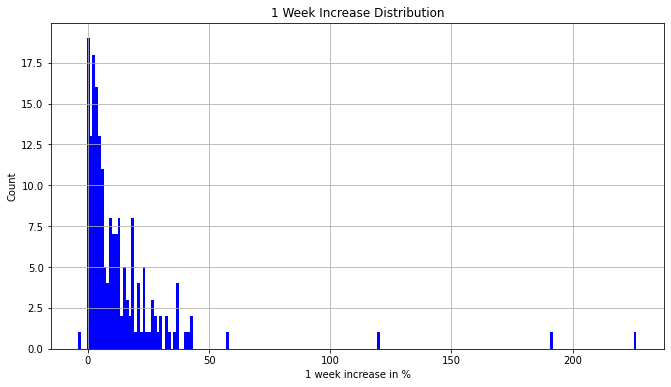

In [82]:
# Viszualise data for 1 week % increase.

one_week_increase_df['1 week % increase'].hist(bins=200, figsize=(11,6), color="blue")

plt.xlabel("1 week increase in %")
plt.ylabel("Count")
plt.title("1 Week Increase Distribution")

plt.show()

On average the 1 week % increase distribution is centered at small percentage areas arround 0 %.